In [1]:
import pandas as pd

In [2]:
import os
os.getcwd()
os.chdir("C:\\Users\\pc\\OneDrive\\Desktop\\movies")


In [5]:
df_movies= pd.read_excel("IMDb_movies_Data_and_ERD.xlsx",sheet_name="movies")
df_movies

,id,title,year,date_published,duration,country,worlwide_gross_income,languages,production_company
0,tt0012494,Der müde Tod,2017,2017-06-09,97,Germany,$ 12156,German,Decla-Bioscop AG
1,tt0038733,A Matter of Life and Death,2017,2017-12-08,104,UK,$ 124241,"English, French, Russian",The Archers
2,tt0361953,The Nest of the Cuckoo Birds,2017,2017-10-16,81,USA,NaN,English,Bert Williams Motion Pictures and Distributor
3,tt0235166,Against All Hope,2017,2017-10-20,90,USA,NaN,English,NaN
4,tt0337383,Vaikai is Amerikos viesbucio,2017,2017-03-09,88,Soviet Union,NaN,"Lithuanian, Russian",Lietuvos Kinostudija
...,...,...,...,...,...,...,...,...,...
7992,tt9903716,Jessie,2019,2019-03-15,106,India,NaN,Telugu,Ekaa Art Production
7993,tt9905412,Ottam,2019,2019-03-08,120,India,$ 4791,Malayalam,Thomas Thiruvalla Films
7994,tt9905462,Pengalila,2019,2019-03-08,111,India,NaN,Malayalam,Benzy Productions
7995,tt9911774,Padmavyuhathile Abhimanyu,2019,2019-03-08,130,India,NaN,Malayalam,RMCC Productions


In [7]:
df_genres= pd.read_excel("IMDb_movies_Data_and_ERD.xlsx",sheet_name="genre")
df_genres

,movie_id,genre
0,tt0012494,Thriller
1,tt0012494,Fantasy
2,tt0012494,Drama
3,tt0038733,Fantasy
4,tt0038733,Drama
...,...,...
14657,tt9905412,Drama
14658,tt9905462,Drama
14659,tt9911774,Drama
14660,tt9914286,Family


In [9]:
df_role= pd.read_excel("IMDb_movies_Data_and_ERD.xlsx",sheet_name="role_mapping")
df_role

,movie_id,name_id,category
0,tt0038733,nm0000057,actor
1,tt0038733,nm0001375,actress
2,tt0038733,nm0178509,actor
3,tt0038733,nm0126402,actress
4,tt0060908,nm0000869,actor
...,...,...,...
15610,tt9899880,nm2544899,actress
15611,tt9903716,nm10592896,actress
15612,tt9903716,nm7237124,actress
15613,tt9903716,nm5118890,actor


In [11]:
df_names= pd.read_excel("IMDb_movies_Data_and_ERD.xlsx",sheet_name="names")
df_names

,id,name,height,date_of_birth,known_for_movies
0,nm0000002,Lauren Bacall,174.0,1924-09-16,NaN
1,nm0000110,Kenneth Branagh,177.0,1960-12-10,tt3402236
2,nm0000009,Richard Burton,175.0,1925-11-10,NaN
3,nm0000114,Steve Buscemi,175.0,1957-12-13,tt4686844
4,nm0000014,Olivia de Havilland,163.0,1916-07-01,NaN
...,...,...,...,...,...
25730,nm9988815,Nat Kitcharit,NaN,NaN,tt8733014
25731,nm9988816,Warisara Yu,NaN,NaN,tt8733014
25732,nm9988817,Apiwich Reardon,NaN,NaN,tt8733014
25733,nm9991000,Divyansha Kaushik,NaN,NaN,tt8737614


In [13]:
df_ratings= pd.read_excel("IMDb_movies_Data_and_ERD.xlsx",sheet_name="ratings")
df_ratings

,movie_id,avg_rating,total_votes,median_rating
0,tt0012494,7.7,4695,8.0
1,tt0038733,8.1,17693,8.0
2,tt0060908,7.5,3392,8.0
3,tt0069049,6.9,5014,7.0
4,tt0071145,8.2,789,8.0
...,...,...,...,...
7992,tt9903716,7.2,219,9.0
7993,tt9905412,7.8,510,9.0
7994,tt9905462,8.4,604,9.0
7995,tt9911774,8.4,369,9.0


In [16]:
# How many movies are in the database?
df_movies["title"].count()


7997

In [25]:
#How many movies were released each year?
df_movies_per_year = df_movies.groupby("year")["id"].count()
df_movies_per_year.columns = ["year", "total_movies"]
df_movies_per_year


year
2017    3052
2018    2944
2019    2001
Name: id, dtype: int64

In [19]:
# What are the most common languages in movies?
df_language_count = df_movies["languages"].value_counts()
df_language_count.columns = ["languages", "count"]
df_language_count.head(10)

languages
English      3095
Spanish       274
French        260
Hindi         255
Japanese      190
Malayalam     172
Turkish       171
Tamil         170
Telugu        136
Italian       112
Name: count, dtype: int64

In [43]:
# Do movies with more votes tend to have higher ratings? (Correlation between votes & ratings)
correlation = df_ratings["total_votes"].corr(df_ratings["avg_rating"])
print("Correlation:", correlation)

Correlation: 0.15535004080869788


In [35]:
# corr value of 0.155 indicates a weak relationship b/w the 2 variables.

In [45]:
# What is the average and standard deviation of movie durations?
a=df_movies["duration"].mean()
b=df_movies["duration"].std()
print(a,b)

103.8935850944104 22.028304024675098


In [47]:
#Is there a correlation between movie duration and release year? Are movies getting longer/shorter over time?
correlation = df_movies["duration"].corr(df_movies["year"])
print("Correlation:", correlation)

Correlation: 0.05077829111400785


In [ ]:
# corr value of 0.05 indicates a very weak relationship between the 2 variables.

In [15]:
df_movies["worlwide_gross_income"] = df_movies["worlwide_gross_income"].replace('[\$,]', '', regex=True).astype(float)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\pc\AppData\Local\Temp\ipykernel_14208\315435222.py:1: SyntaxWarning: invalid escape sequence '\$'
  df_movies["worlwide_gross_income"] = df_movies["worlwide_gross_income"].replace('[\$,]', '', regex=True).astype(float)


In [105]:
pd.options.display.float_format = '{:,.0f}'.format
df_movies.describe()

,year,date_published,duration,worlwide_gross_income
count,"7,997",7997,"7,997","4,273"
mean,"2,018",2018-05-06 16:30:43.891459328,104,"24,168,380"
min,"2,017",2017-01-01 00:00:00,41,37
25%,"2,017",2017-09-07 00:00:00,90,"60,040"
50%,"2,018",2018-04-17 00:00:00,99,"540,930"
75%,"2,019",2019-01-01 00:00:00,114,"4,697,364"
max,"2,019",2019-12-27 00:00:00,808,"2,797,800,564"
std,1,NaN,22,"116,372,608"


In [37]:
# create a pivot table expressing sum,mean,max and min of collection and average ratings based on languages and countries 
pd.options.display.float_format = '{:,.0f}'.format
merged_df = pd.merge(df_genres, df_movies, left_on='movie_id', right_on='id')
pivot_table = pd.pivot_table( merged_df, index='genre', values='worlwide_gross_income', aggfunc=['sum', 'mean', 'max', 'min'])
pivot_table

,sum,mean,max,min
,worlwide_gross_income,worlwide_gross_income,worlwide_gross_income,worlwide_gross_income
genre,,,,
Action,"51,864,030,632","66,322,290","2,797,800,564",50
Adventure,"51,864,502,718","135,770,950","2,797,800,564",214
Comedy,"30,287,794,123","20,409,565","1,073,168,585",202
Crime,"7,192,619,351","14,589,492","995,064,593",37
Drama,"34,212,060,430","14,231,306","2,797,800,564",39
Family,"8,174,614,075","49,845,208","1,263,521,126",499
Fantasy,"16,615,337,760","83,915,847","1,332,539,889",190
Horror,"7,657,747,992","19,787,463","700,449,318",74


In [125]:
#Which films were “blockbuster disappointments”—i.e. in the top 10% of worldwide gross income but in the bottom 25% of average ratings?

df = df_movies.merge(df_ratings, left_on="id", right_on="movie_id")
high_gross_q = df["worlwide_gross_income"].quantile(0.9)
low_rating_q = df["avg_rating"].quantile(0.25)


blockbuster_disappointments = df[(df["worlwide_gross_income"] >= high_gross_q)&(df["avg_rating"] <= low_rating_q)]
result = (blockbuster_disappointments[["title", "worlwide_gross_income", "avg_rating"]].sort_values("worlwide_gross_income", ascending=False)
          .reset_index(drop=True)
)

result.head(10)

,title,worlwide_gross_income,avg_rating
0,Fifty Shades Darker,"381,545,846",5
1,Fifty Shades Freed,"371,985,018",4
2,The Emoji Movie,"217,776,646",3
3,A Wrinkle in Time,"132,675,864",4
4,Buddies in India,"109,593,721",4
5,"Hello, Mrs. Money","86,874,070",5
6,Rings,"83,080,890",4
7,A Madea Family Funeral,"74,747,725",4
8,Snatched,"60,845,711",4
9,Jian jun da ye,"60,600,361",4


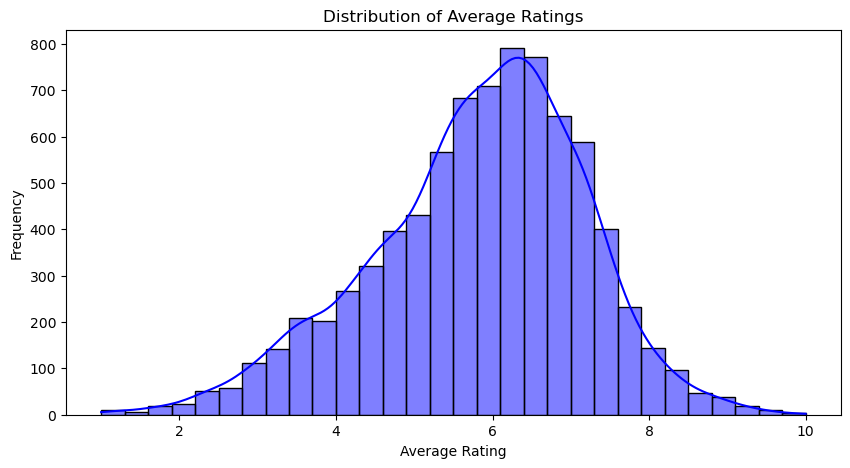

-0.4391836019743407
The distribution is left-skewed (negatively skewed).


In [39]:
#How does the distribution of average ratings look? Is it skewed?
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

plt.figure(figsize=(10, 5))
sns.histplot(df_ratings["avg_rating"], bins=30, kde=True, color="blue")
plt.xlabel("Average Rating")
plt.ylabel("Frequency")
plt.title("Distribution of Average Ratings")
plt.show()

skewness = df_ratings["avg_rating"].skew()
print(skewness)


if skewness > 0:
    print("The distribution is right-skewed (positively skewed).")
elif skewness < 0:
    print("The distribution is left-skewed (negatively skewed).")
else:
    print("The distribution is symmetric.")


   year  avg_rating
0  2017    5.748296
1  2018    5.760768
2  2019    5.963668


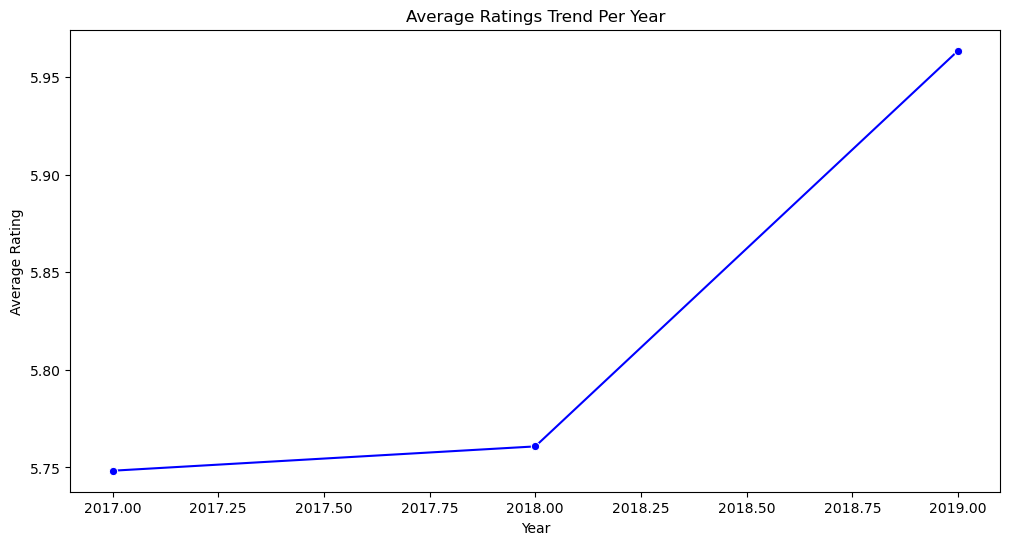

In [99]:
# What are the average ratings trends per year?

df = pd.merge(df_movies,df_ratings,left_on="id",right_on="movie_id")
df_yearly_ratings = df.groupby("year", as_index=False)["avg_rating"].mean()
print(df_yearly_ratings.head())  

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_yearly_ratings, x="year", y="avg_rating", marker="o", color="blue")
plt.xlabel("Year")
plt.ylabel("Average Rating")
plt.title("Average Ratings Trend Per Year")
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_18984\783466458.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="genre", y="avg_rating", data=df, palette="coolwarm")


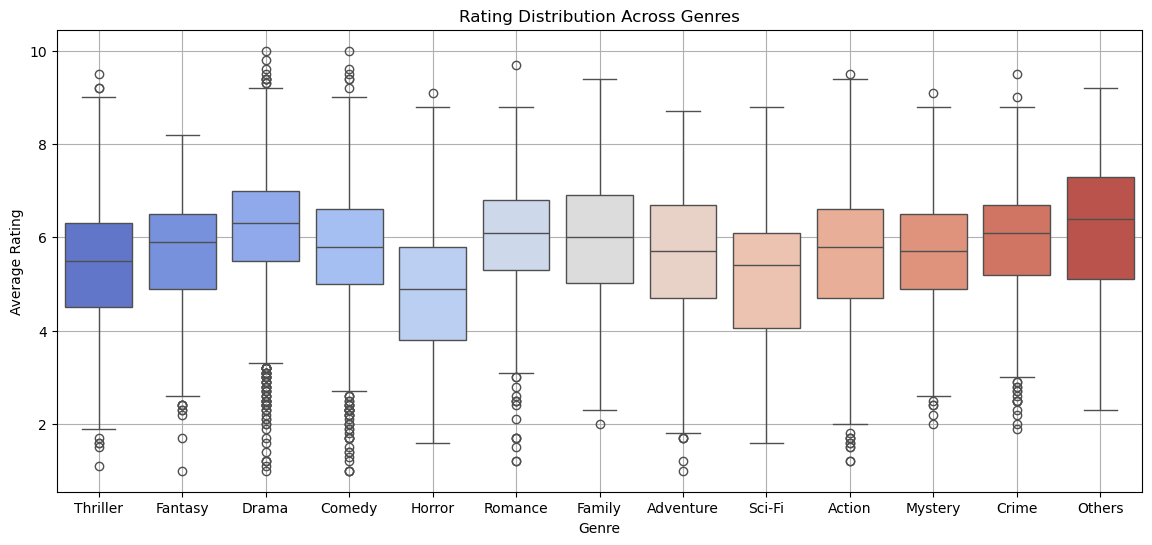

In [101]:
# What is distribution of Avg Rating across genres.

df = df_ratings.merge(df_genres, left_on="movie_id", right_on="movie_id", how="inner")
df = df.dropna(subset=["avg_rating"])

plt.figure(figsize=(14, 6))
sns.boxplot(x="genre", y="avg_rating", data=df, palette="coolwarm")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Rating Distribution Across Genres")
plt.grid(True)
plt.show()

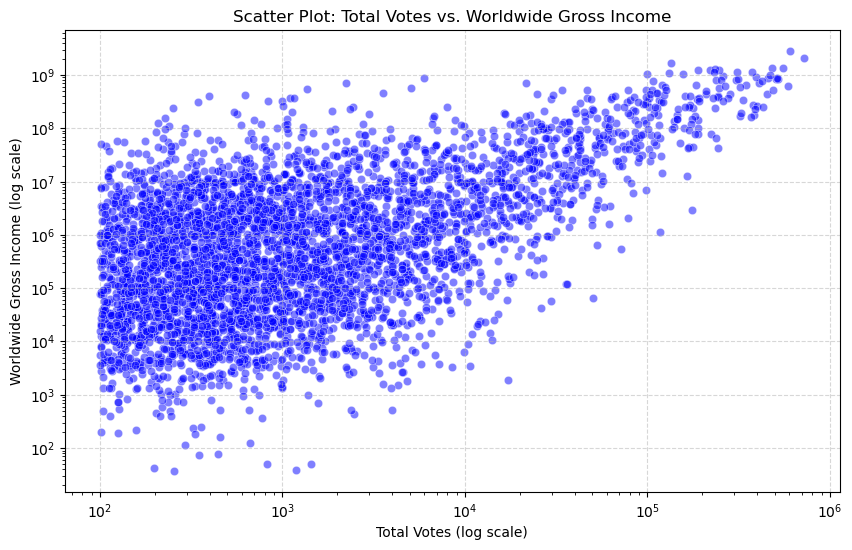

Correlation: 0.7516456038857183
good correlation between the 2


In [103]:
# Is there a relationship between the number of votes a movie receives and its worldwide gross income?

df = pd.merge(df_movies,df_ratings, left_on="id", right_on="movie_id")
df = df.dropna(subset=["total_votes", "worlwide_gross_income"])


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["total_votes"], y=df["worlwide_gross_income"], alpha=0.5, color="blue")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Total Votes (log scale)")
plt.ylabel("Worldwide Gross Income (log scale)")
plt.title("Scatter Plot: Total Votes vs. Worldwide Gross Income")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

correlation = df["total_votes"].corr(df["worlwide_gross_income"])
print("Correlation:", correlation)
if correlation>0.7:
    print("good correlation between the 2")

In [ ]:
# good corelation b/w the 2 as correlation value is 0.75

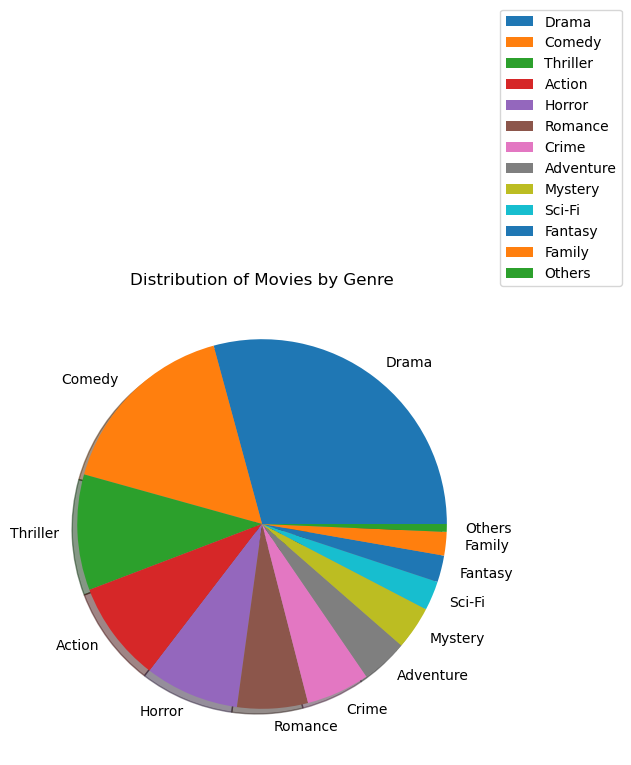

In [95]:
#What is the distribution of movies by genre?
df = df_movies.merge(df_genres, left_on="id", right_on="movie_id")
genre_counts = df["genre"].value_counts()

plt.figure(figsize=(10, 6))
plt.pie(genre_counts, labels=genre_counts.index,shadow=True)
plt.title("Distribution of Movies by Genre")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

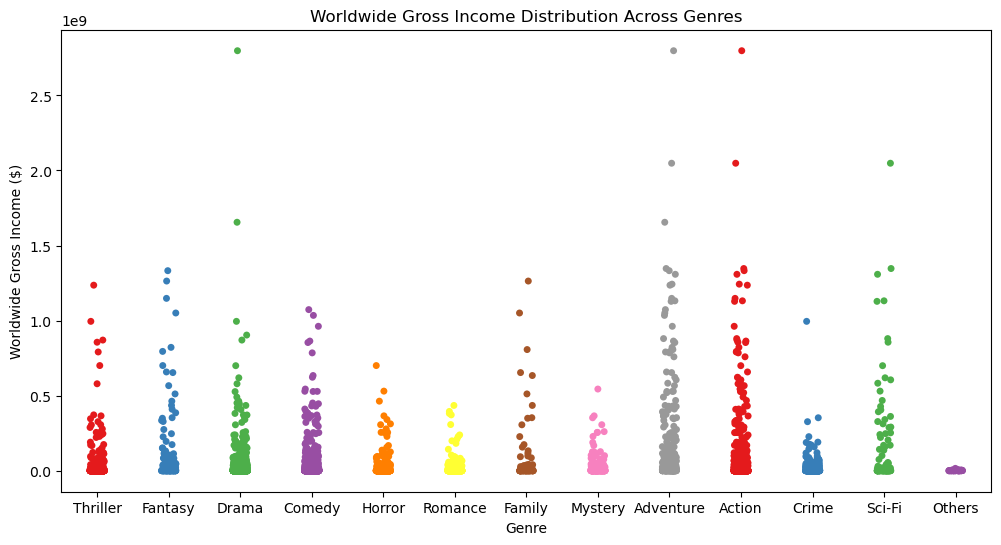

In [99]:
#How does worldwide gross income vary across different genres?
df = df_movies.merge(df_genres, left_on="id", right_on="movie_id")

plt.figure(figsize=(12, 6))
sns.stripplot(data=df, x="genre", y="worlwide_gross_income", hue="genre", palette="Set1")
plt.title("Worldwide Gross Income Distribution Across Genres")
plt.xlabel("Genre")
plt.ylabel("Worldwide Gross Income ($)")
plt.show()

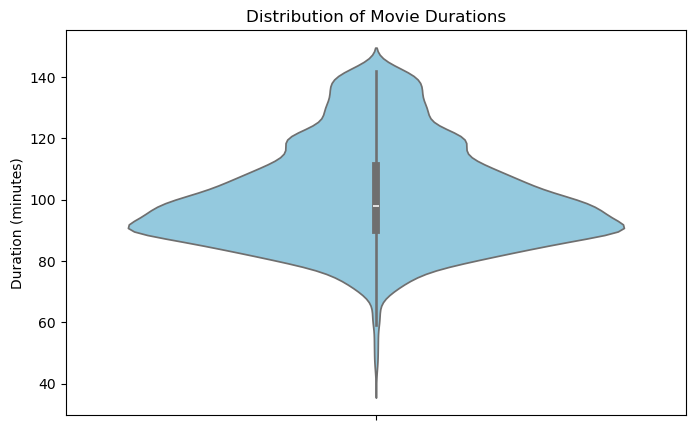

In [89]:
#How is the distribution of movie durations spread across different movies?

plt.figure(figsize=(8, 5))
df_filtered = df_movies[df_movies["duration"] < df_movies["duration"].quantile(0.95)]
sns.violinplot(y=df_filtered["duration"], color="skyblue")
plt.title("Distribution of Movie Durations")
plt.ylabel("Duration (minutes)")
plt.show()

In [71]:
# is there a relationship between country of movie and genres ?
# will apply chi square test
# null hypo : no relation between the 2 variables
# alt hypo : relation present
# ci = 95%
# if P > alpha - accept null
# if p < alpha - reject null



In [135]:
f=df_movies.set_index("id").join(df_genres.set_index("movie_id"),on="id",how="inner")
counts=f["country"].value_counts()

In [137]:
counts=f["country"].value_counts()
f = f[f["country"].isin(counts[counts > 21].index)]

In [139]:
c=pd.crosstab(f["country"],f["genre"])
c

genre,Action,Adventure,Comedy,Crime,Drama,Family,Fantasy,Horror,Mystery,Others,Romance,Sci-Fi,Thriller
country,,,,,,,,,,,,,
Argentina,1,0,7,5,24,2,4,3,6,0,7,0,3
"Argentina, Spain",2,1,6,6,9,0,0,0,3,0,0,1,2
Australia,12,11,16,6,41,4,4,18,6,0,5,9,14
Bangladesh,3,0,0,2,12,2,1,0,1,0,3,1,2
Belgium,2,0,5,3,17,1,0,2,1,0,2,0,1
Brazil,4,3,34,6,50,4,1,8,3,2,7,0,9
Canada,20,12,49,19,103,14,7,56,18,3,14,21,54
"Canada, USA",9,2,13,12,23,1,3,9,10,0,4,7,14
China,33,12,29,16,55,0,17,2,8,1,19,9,8


In [141]:
from scipy import stats

In [143]:
stats.contingency.chi2_contingency(c)

Chi2ContingencyResult(statistic=2422.075569442756, pvalue=4.455815718707968e-213, dof=612, expected_freq=array([[5.63589573e+00, 2.22862361e+00, 1.07210692e+01, 3.44330068e+00,
        1.69025403e+01, 1.29702806e+00, 1.39996679e+00, 5.57413249e+00,
        2.28009298e+00, 4.42636560e-01, 3.99916985e+00, 1.61099120e+00,
        6.46455255e+00],
       [2.72704632e+00, 1.07836626e+00, 5.18761415e+00, 1.66611323e+00,
        8.17864851e+00, 6.27594222e-01, 6.77403287e-01, 2.69716088e+00,
        1.10327080e+00, 2.14178981e-01, 1.93508218e+00, 7.79511871e-01,
        3.12800930e+00],
       [1.32716254e+01, 5.24804914e+00, 2.52463888e+01, 8.10841773e+00,
        3.98027561e+01, 3.05429188e+00, 3.29669600e+00, 1.31261830e+01,
        5.36925120e+00, 1.04233771e+00, 9.41739997e+00, 3.79362444e+00,
        1.52229786e+01],
       [2.45434169e+00, 9.70529636e-01, 4.66885273e+00, 1.49950191e+00,
        7.36078366e+00, 5.64834800e-01, 6.09662959e-01, 2.42744479e+00,
        9.92943716e-01, 1.92

In [81]:
# p very small reject null hypothesis
# there is very strong relationship between countries and genres

In [19]:
# Which movies exhibit the greatest “rating volatility,” i.e. the largest absolute difference between their average rating and median rating?
df = df_ratings.merge(df_movies[["id","title"]], left_on="movie_id", right_on="id")
df["rating_volatility"] = (df["avg_rating"] - df["median_rating"]).abs()

top_volatile = (
    df.sort_values("rating_volatility", ascending=False).loc[:, ["title","avg_rating","median_rating","total_votes","rating_volatility"]].head(10))
top_volatile

,title,avg_rating,median_rating,total_votes,rating_volatility
7584,Zoo Wars 2,2.3,10.0,191,7.7
221,Ecinni: Tilsimli Mezar,2.9,10.0,145,7.1
222,Cin: Ask Büyüsü,3.0,10.0,129,7.0
211,Efsunlu - Kabirden Gelen,3.1,10.0,132,6.9
366,Zombie Beach,3.4,10.0,547,6.6
6225,Parayi Bulduk,3.5,10.0,758,6.5
7736,Bana Bir Soygun Yaz 2,3.5,10.0,497,6.5
7177,Mocking Of Christ,3.6,10.0,171,6.4
7753,Pixy Dragons,3.6,10.0,118,6.4
7877,Bekar Bekir,3.6,10.0,452,6.4


In [147]:
# Which genres have the most variable ratings—i.e., highest and lowest standard deviation of average movie ratings?

df = (df_genres
      .merge(df_ratings, left_on="movie_id", right_on="movie_id")
     )
genre_rating_var = ( df.groupby("genre")["avg_rating"].agg(std_dev="std", movie_count="count").reset_index())
genre_rating_var = genre_rating_var[genre_rating_var["movie_count"] >= 10]

most_variable = genre_rating_var.sort_values("std_dev", ascending=False).head(5)
most_consistent = genre_rating_var.sort_values("std_dev", ascending=True).head(5)
print("Most Variable Genres:")
print(most_variable)
print("\nMost Consistent Genres:")
print(most_consistent)


Most Variable Genres:
        genre  std_dev  movie_count
9      Others        2          100
1   Adventure        1          591
0      Action        1         1289
11     Sci-Fi        1          375
7      Horror        1         1208

Most Consistent Genres:
      genre  std_dev  movie_count
10  Romance        1          906
4     Drama        1         4285
3     Crime        1          813
2    Comedy        1         2412
8   Mystery        1          555
